<a href="https://colab.research.google.com/github/umair594/100-Prediction-Models-/blob/main/Lasso_Regression_Model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 5: Lasso Regression – Linear Regression with L1 Regularization**

**Objective**

Lasso Regression is a regularized linear regression technique that uses L1 regularization.

L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients.

It shrinks some coefficients to zero, effectively performing feature selection, which is useful for high-dimensional datasets.

# **Step 1: Import Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Step 2: Generate or Load Data**

We’ll generate synthetic data with some irrelevant features to show Lasso’s feature selection:

In [32]:
np.random.seed(42)

# Relevant features
X1 = np.random.rand(100, 1) * 10
X2 = np.random.rand(100, 1) * 5

# Irrelevant/noisy features
X3 = np.random.rand(100, 1) * 2
X4 = np.random.rand(100, 1) * 3

# Combine features
X = np.hstack((X1, X2, X3, X4))

# Target depends only on X1 and X2
y = 5*X1 - 3*X2 + np.random.randn(100, 1) * 2

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explanation:**

X3 and X4 are irrelevant features.

Lasso should ideally shrink their coefficients to zero.

# Step 3: Fit Standard Linear Regression

In [33]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("Coefficients:", linear_model.coef_)

Linear Regression:
R2 Score: 0.985452928948323
MSE: 3.7684489788596864
Coefficients: [[ 4.94252055 -3.09390079 -0.39432749  0.25322467]]


**Observation:**

Linear Regression uses all features, including irrelevant ones, which can reduce model interpretability.

# **Step 4: Fit Lasso Regression**

In [34]:
# Apply Lasso with alpha=0.5 (regularization strength)
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression (alpha=0.5):")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Coefficients:", lasso_model.coef_)


Lasso Regression (alpha=0.5):
R2 Score: 0.9871680527419902
MSE: 3.3241425967775013
Coefficients: [ 4.89466053 -2.82778031 -0.          0.        ]


**Explanation:**

Lasso shrinks irrelevant coefficients toward zero, performing automatic feature selection.

Alpha controls the strength of L1 regularization.

# **Step 5: Compare Coefficients**

In [35]:
coef_df = pd.DataFrame({
    'Feature': ['X1', 'X2', 'X3', 'X4'],
    'Linear Coef': linear_model.coef_.flatten(),
    'Lasso Coef': lasso_model.coef_.flatten()
})
print(coef_df)

  Feature  Linear Coef  Lasso Coef
0      X1     4.942521    4.894661
1      X2    -3.093901   -2.827780
2      X3    -0.394327   -0.000000
3      X4     0.253225    0.000000


**Observation:**

Lasso typically sets X3 and X4 coefficients to zero or very small values, keeping only relevant features.

Linear Regression retains all coefficients.

# **Step 6: Experiment with Different Alpha Values**

In [36]:
alphas = [0.01, 0.1, 0.5, 1, 5]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print(f"Alpha={alpha} -> R2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}, Coefs: {lasso.coef_}")

Alpha=0.01 -> R2: 0.9856, MSE: 3.7310, Coefs: [ 4.94219674 -3.08696446 -0.36514598  0.24274319]
Alpha=0.1 -> R2: 0.9867, MSE: 3.4486, Coefs: [ 4.93893804 -3.02491575 -0.10350774  0.1480976 ]
Alpha=0.5 -> R2: 0.9872, MSE: 3.3241, Coefs: [ 4.89466053 -2.82778031 -0.          0.        ]
Alpha=1 -> R2: 0.9860, MSE: 3.6195, Coefs: [ 4.84260934 -2.59233885 -0.          0.        ]
Alpha=5 -> R2: 0.9348, MSE: 16.8870, Coefs: [ 4.42619978 -0.70880717  0.         -0.        ]


**Observation:**

Small alpha → minimal regularization → more features retained.

Large alpha → strong regularization → more coefficients shrink to zero.

# **Step 7: Visualization of Feature Selection**

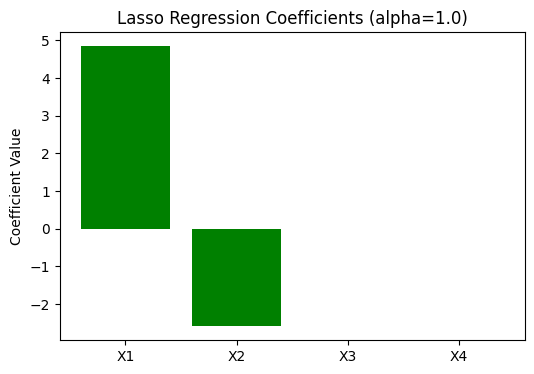

In [37]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

plt.figure(figsize=(6,4))
plt.bar(['X1','X2','X3','X4'], lasso.coef_, color='green')
plt.title("Lasso Regression Coefficients (alpha=1.0)")
plt.ylabel("Coefficient Value")
plt.show()

**Observation:**

Irrelevant features (X3, X4) have coefficients near zero, illustrating Lasso’s feature selection.

# **Step 8: Summary & Conclusion**

>Lasso Regression uses L1 regularization to shrink coefficients.

>It is effective for feature selection, especially with high-dimensional or noisy data.

>Alpha controls regularization strength.

>Unlike Ridge, Lasso can set coefficients exactly to zero, simplifying the model.

**Optional Extension**

>Use LassoCV from sklearn to automatically select the optimal alpha using cross-validation.

>Compare Lasso vs Ridge on datasets with many irrelevant features.